In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def display_image(image, figsize=(10, 10), saveto=""):
    plt.figure(figsize=figsize)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    if len(saveto) != 0:
        plt.savefig(saveto)
    plt.show()

In [3]:
def read_frame(cap):
    ret, frame = cap.read()
    if not ret:
        return None
    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    return frame

In [4]:
def read_all_frames(cap):
    frames = []
    while cap.isOpened():
        frame = read_frame(cap)
        if frame is None:
            break
        frames.append(frame)
    return frames

In [5]:
query_capture = cv.VideoCapture('train/task2/01_1.mp4')
reference_capture = cv.VideoCapture('train/task2/01_2.mp4')

In [6]:
first_frame_query = read_frame(query_capture)
if first_frame_query is None:
    print("First query frame is None, panic!")

In [7]:
reference_frames = read_all_frames(reference_capture)

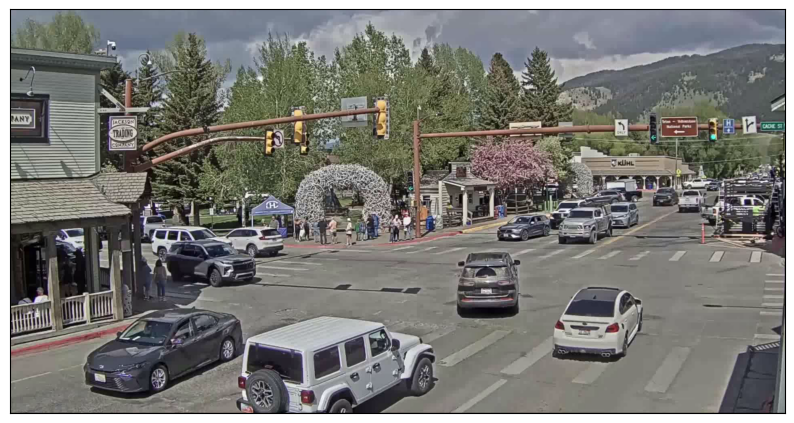

True

In [8]:
display_image(first_frame_query)
cv.imwrite("firstframe_A.png", first_frame_query)

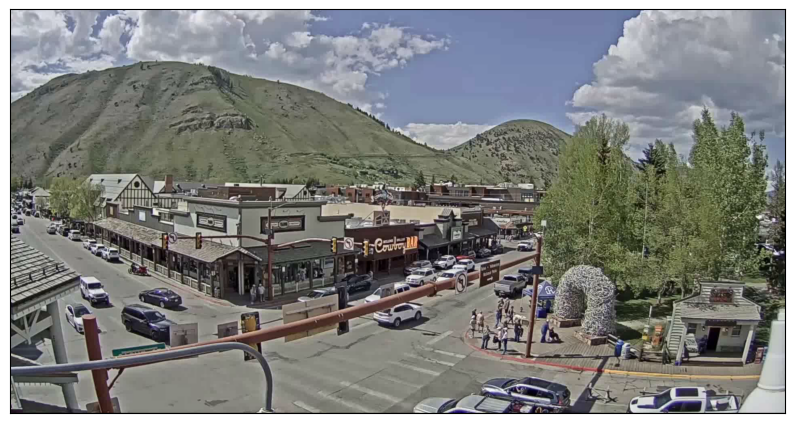

True

In [9]:
display_image(reference_frames[0], saveto="firstframe_B.png")
cv.imwrite("firstframe_B.png", reference_frames[0])

In [27]:
coordinates_a = np.array(
    [
        [1011, 564],
        [1040, 514],
        [1127, 437],
        [652, 313],
        [737, 311],
        [313, 473],
        [920, 238],
        [666, 314],
        [1005, 280],
        [599, 495],
        [95, 212],
        [1890, 288],
        [1658, 288],
        [1433, 288],
        [1228, 549],
        [1831, 285],
        [1397, 529],
        [653, 474],
        [287, 689],
        [219, 187],
        [1309, 849],
    ]
)

coordinates_b = np.array(
    [
        [1257, 857],
        [1508, 821],
        [1662, 762],
        [797, 575],
        [875, 582],
        [512, 617],
        [384, 564],
        [841, 576],
        [1307, 568],
        [1270, 693],
        [536, 512],
        [324, 854],
        [755, 757],
        [1039, 673],
        [1187, 925],
        [435, 821],
        [1022, 971],
        [1304, 690],
        [513, 690],
        [569, 503],
        [212, 770],
    ]
)

In [28]:
F, mask = cv.findFundamentalMat(coordinates_a, coordinates_b, cv.FM_8POINT)
print(F)
print(mask)

[[ 1.57056802e-07  8.45016110e-07 -4.44111963e-04]
 [ 8.42166680e-07 -5.48651896e-07 -1.70580508e-03]
 [-5.02495893e-04  4.61225470e-04  1.00000000e+00]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [29]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        print(pt1, pt2)
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv.circle(img1,tuple(pt1),10,color,-1)
        img2 = cv.circle(img2,tuple(pt2),10,color,-1)
    return img1,img2

[1011  564] [1257  857]
[1040  514] [1508  821]
[1127  437] [1662  762]
[652 313] [797 575]
[737 311] [875 582]
[313 473] [512 617]
[920 238] [384 564]
[666 314] [841 576]
[1005  280] [1307  568]
[599 495] [1270  693]
[ 95 212] [536 512]
[1890  288] [324 854]
[1658  288] [755 757]
[1433  288] [1039  673]
[1228  549] [1187  925]
[1831  285] [435 821]
[1397  529] [1022  971]
[653 474] [1304  690]
[287 689] [513 690]
[219 187] [569 503]
[1309  849] [212 770]


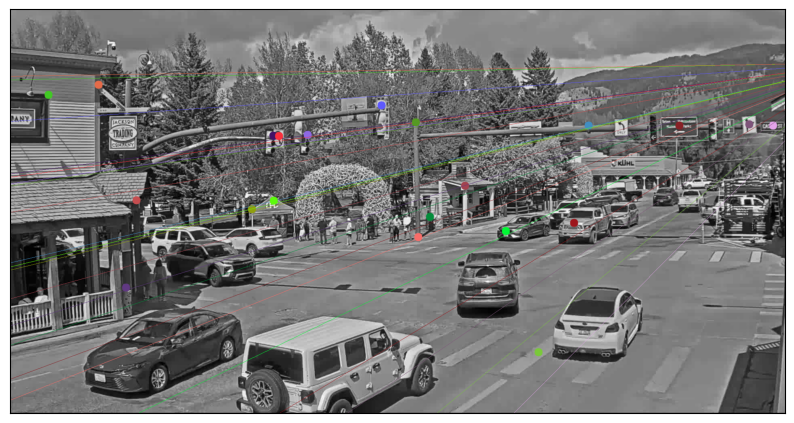

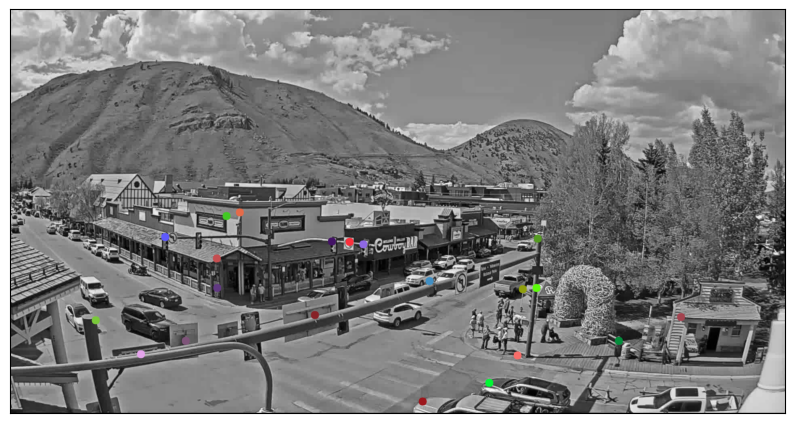

In [30]:
lines1 = cv.computeCorrespondEpilines(coordinates_b.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)

a = cv.cvtColor(first_frame_query, cv.COLOR_RGB2GRAY)
b = cv.cvtColor(reference_frames[0], cv.COLOR_RGB2GRAY)

img5,img6 = drawlines(a,b,lines1, coordinates_a, coordinates_b)

display_image(img5, saveto="a")
display_image(img6, saveto="b")


[1257  857] [1011  564]
[1508  821] [1040  514]
[1662  762] [1127  437]
[797 575] [652 313]
[875 582] [737 311]
[512 617] [313 473]
[384 564] [920 238]
[841 576] [666 314]
[1307  568] [1005  280]
[1270  693] [599 495]
[536 512] [ 95 212]
[324 854] [1890  288]
[755 757] [1658  288]
[1039  673] [1433  288]
[1187  925] [1228  549]
[435 821] [1831  285]
[1022  971] [1397  529]
[1304  690] [653 474]
[513 690] [287 689]
[569 503] [219 187]
[212 770] [1309  849]


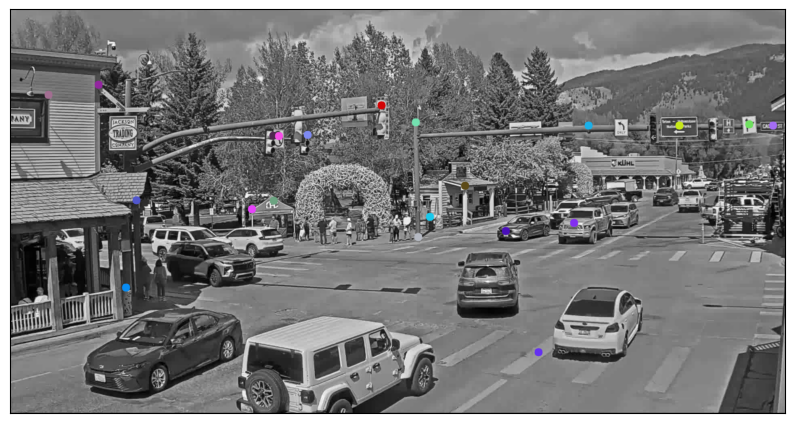

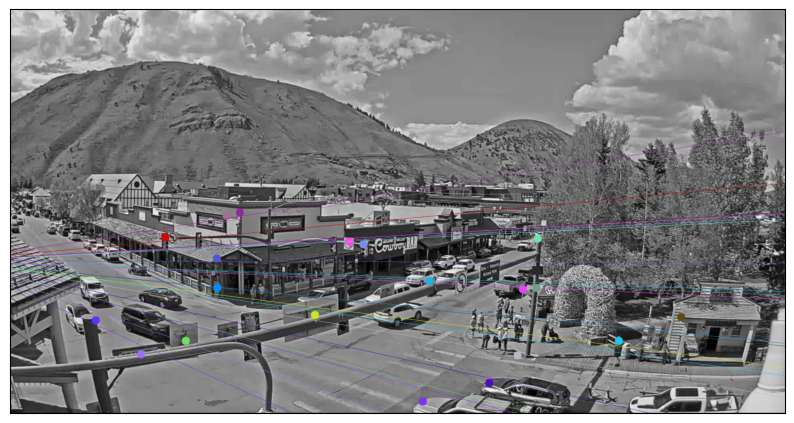

In [31]:
lines2 = cv.computeCorrespondEpilines(coordinates_a.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(b,a,lines2,coordinates_b,coordinates_a)
 

display_image(img4)
display_image(img3)

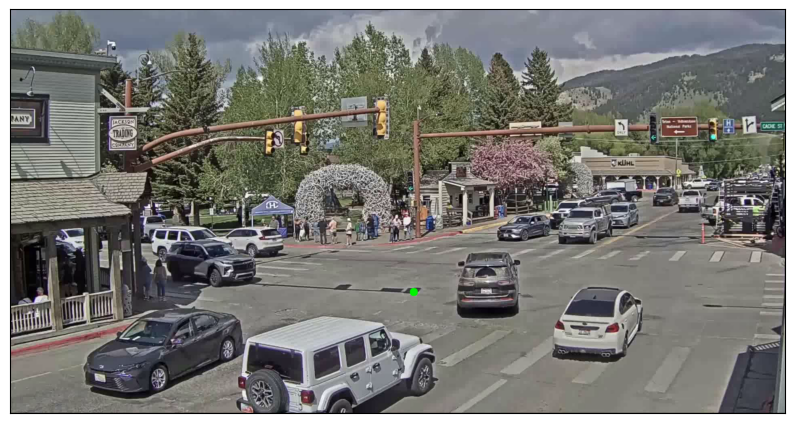

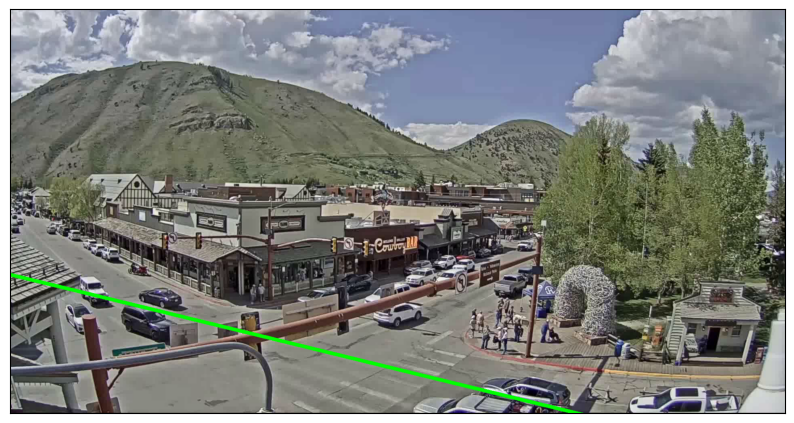

In [32]:
point = np.array([1000, 700])
a = np.copy(first_frame_query) 
b = np.copy(reference_frames[0]) 

cv.circle(a, point, 10, (0, 244, 0), -1)
display_image(a)

line = cv.computeCorrespondEpilines(point.reshape(-1, 1, 2), 1, F)
line = line.reshape(-1, 3)[0]

_,c, _ = a.shape
x0,y0 = map(int, [0, -line[2]/line[1] ])
x1,y1 = map(int, [c, -(line[2]+line[0]*c)/line[1] ])
cv.line(b, (x0, y0), (x1, y1), (0, 255, 0), 7)

display_image(b)

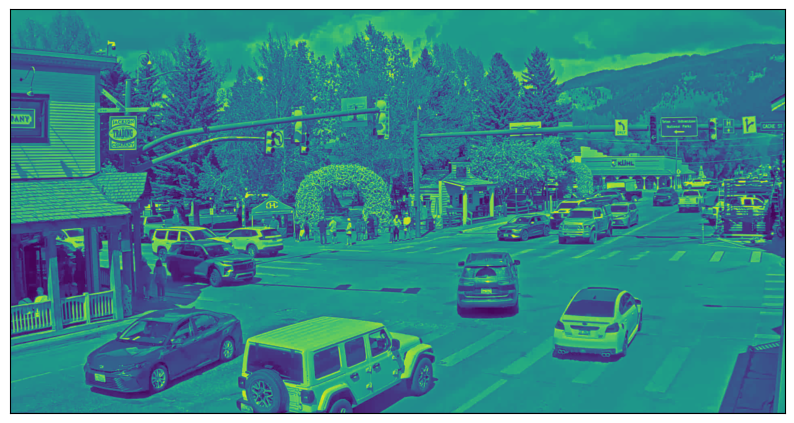

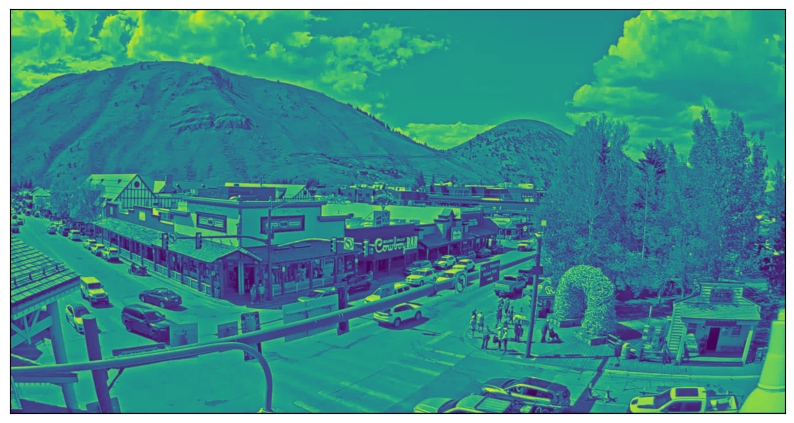

211.94152176380157
2.166226137429476


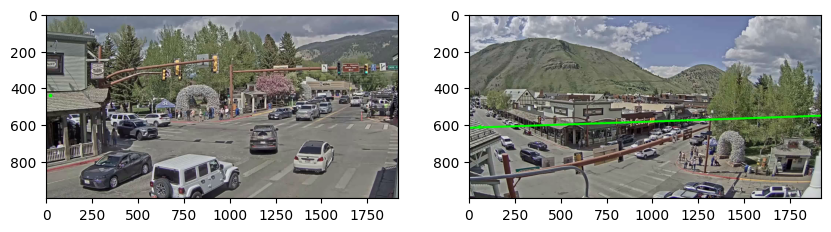

9.270789325237274


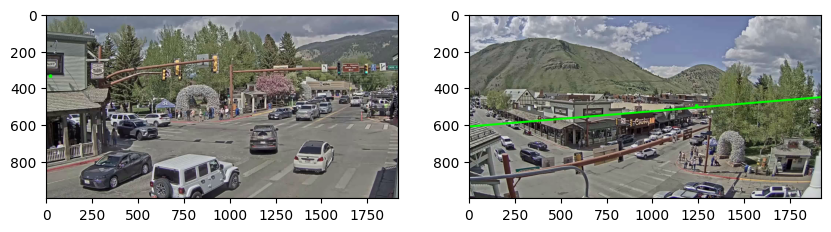

9.723813258111477


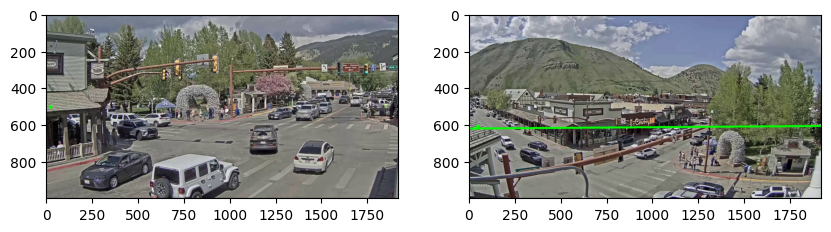

9.720102459192276


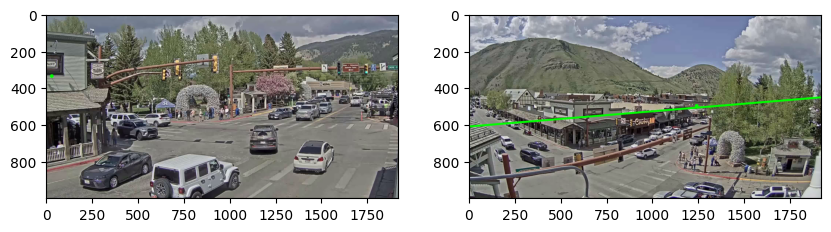

29.40314459055662
28.223669063299894
144.37088406085968
71.20752923935652
65.67096422612667
269.5078427870776
169.0575078614056
25.991908371448517
25.991908371448517
594.3986521810293
42.772266612784065
0.21338505824715245


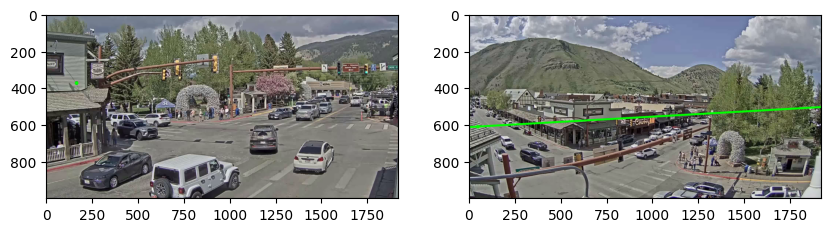

172.7924513220787
104.38021393120289
27.33026660233736
353.9946706962389
305.88250421732664
97.95775759965181
109.78918744623661
258.5121130347252
74.39848470082788
434.20604820287514
129.13448667526245
247.2181068155531
278.7822603136301
4.371749011799693


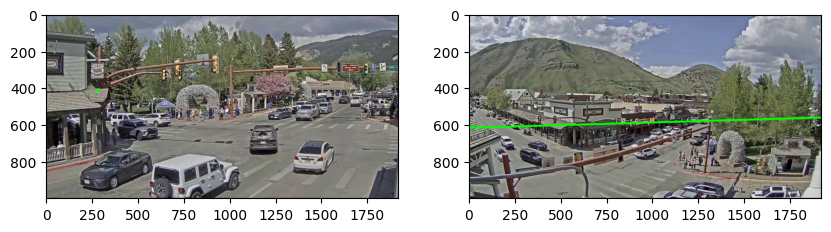

85.28600132465363
206.89207696914673
126.85641600872448
329.19774591238775
294.70604810118675
70.78384906798601
320.99128697388096
154.12299375981092
160.4531624019146
189.66332961102304
560.7367082834244
52.28943488236874
404.35769337415695
154.347192466259
113.08972170948982
276.72539550065994
232.96993613243103
94.20942189861368
28.53121256828308
137.5732977539301
7.378890722990036


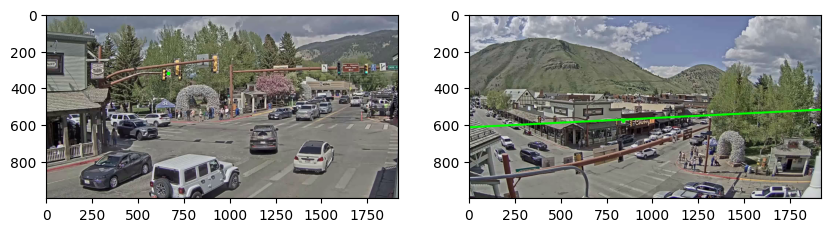

135.58001970499754
19.480655474588275
211.06270915269852
167.42746090888977
348.2418511058003
412.8952018022537
326.8294280767441
101.23197424411774
15.05368024110794
216.7383668422699
51.750839948654175
4.15903377532959


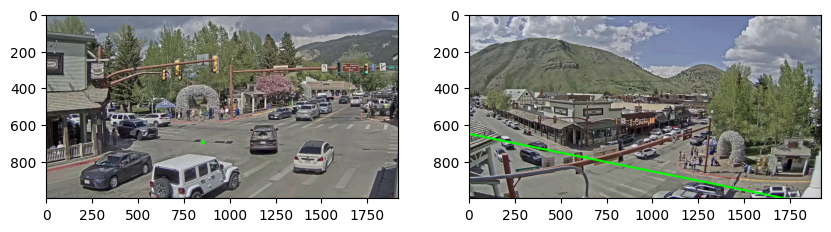

125.98199064284563
315.3254510954291
377.30096769332886
55.761878178231605
299.2164739072323
390.9259486794472
301.9931993778467
239.61923471058813
66.3954302072525
89.97021681070328
166.80592929571867
124.44079067950193
356.9277633385517
292.51492612063885
667.3166290074587
151.49248138070107
243.29113296419382
30.185938253998756
14.619608841515115
44.54812674969435
295.362625092268
297.8230522274971
124.91256173923979
209.19101576507092
435.45423355698586
45.80171325802803
13.563469801155913
65.91402268409729
115.61755900084972
155.70475836098194
364.7679566602681
404.34069818258286
441.703425347805
169.03036955738781
100.79758679866791
516.8325763344765
63.71094590425491
391.64279168844223
204.9943162202835
87.9153196439147
364.21867138147354
181.98811143636703
43.1821573972702
160.84424209594727
155.8691485446184
894.811576962471
71.7288123803623
174.70507383346558
189.3863788843155
317.3598748445511
412.5051831007004
46.84988188743591
13.02071875333786
336.4920306801796
385.157375

In [33]:
a = np.copy(first_frame_query) 
b = np.copy(reference_frames[0]) 

a = cv.cvtColor(a, cv.COLOR_RGB2GRAY)
b = cv.cvtColor(b, cv.COLOR_RGB2GRAY)

display_image(a)
display_image(b)

# Initiate SIFT detector
sift = cv.SIFT_create()
 
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(a, None)
kp2, des2 = sift.detectAndCompute(b, None)
 
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)

points1 = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
points2 = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

for x1, x2 in zip(points1, points2):
    x1 = x1[0].astype(np.int32)
    x2 = x2[0].astype(np.int32)

    line = cv.computeCorrespondEpilines(x1.reshape(-1, 1, 2), 1, F).reshape(-1, 3)[0]

    nom = abs(line[0]*x2[0] + line[1] * x2[1] + line[2])
    denom = np.sqrt(line[0] ** 2 + line[1] ** 2)
    distance = nom/denom
    print(distance)
    if distance > 10:
        continue

    new_a = np.copy(first_frame_query)
    new_b = np.copy(reference_frames[0])

    cv.circle(new_a, x1, 10, (0, 255, 0), -1)
    cv.circle(new_b, x2, 10, (0, 255, 0), -1)

    x0,y0 = map(int, [0, -line[2]/line[1] ])
    x1,y1 = map(int, [c, -(line[2]+line[0]*c)/line[1] ]) 
    cv.line(new_b, (x0, y0), (x1, y1), (0, 255, 0), 10)

    fig, axs = plt.subplots(1, 2, figsize=(10, 10))

    axs[0].imshow(new_a)
    axs[1].imshow(new_b)
    plt.show()